# Predicting the Calories loss using linear regression

Import all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
calories = pd.read_csv(r"C:\Users\pavanreddy\Documents\datasets\Datasets\calories.csv")
exercise = pd.read_csv(r"C:\Users\pavanreddy\Documents\datasets\Datasets\exercise.csv")
df = pd.merge(exercise , calories , on ='User_ID')

In [3]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
df = df[df['Calories']<300]
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [6]:
df.shape

(14998, 9)

Apply label encoding to gender column

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [8]:
data =df.drop('User_ID' , axis =1)

In [27]:
data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0


Analyzing by plotting

Text(0.5, 1.0, 'Duration vs plot')

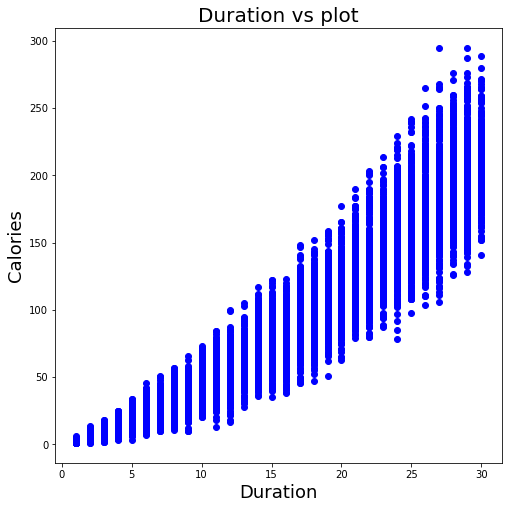

In [9]:
plt.figure(figsize =(8,8))
plt.plot(df['Duration'] , df['Calories'] , 'bo')
plt.xlabel('Duration' , size =18)
plt.ylabel('Calories' , size =18)
plt.title('Duration vs plot' , size = 20)

<BarContainer object of 14998 artists>

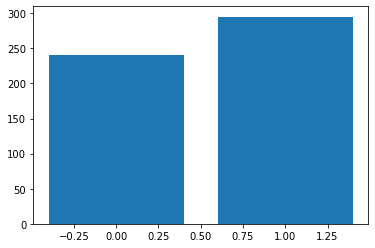

In [10]:
plt.bar(df['Gender'] , df['Calories'])

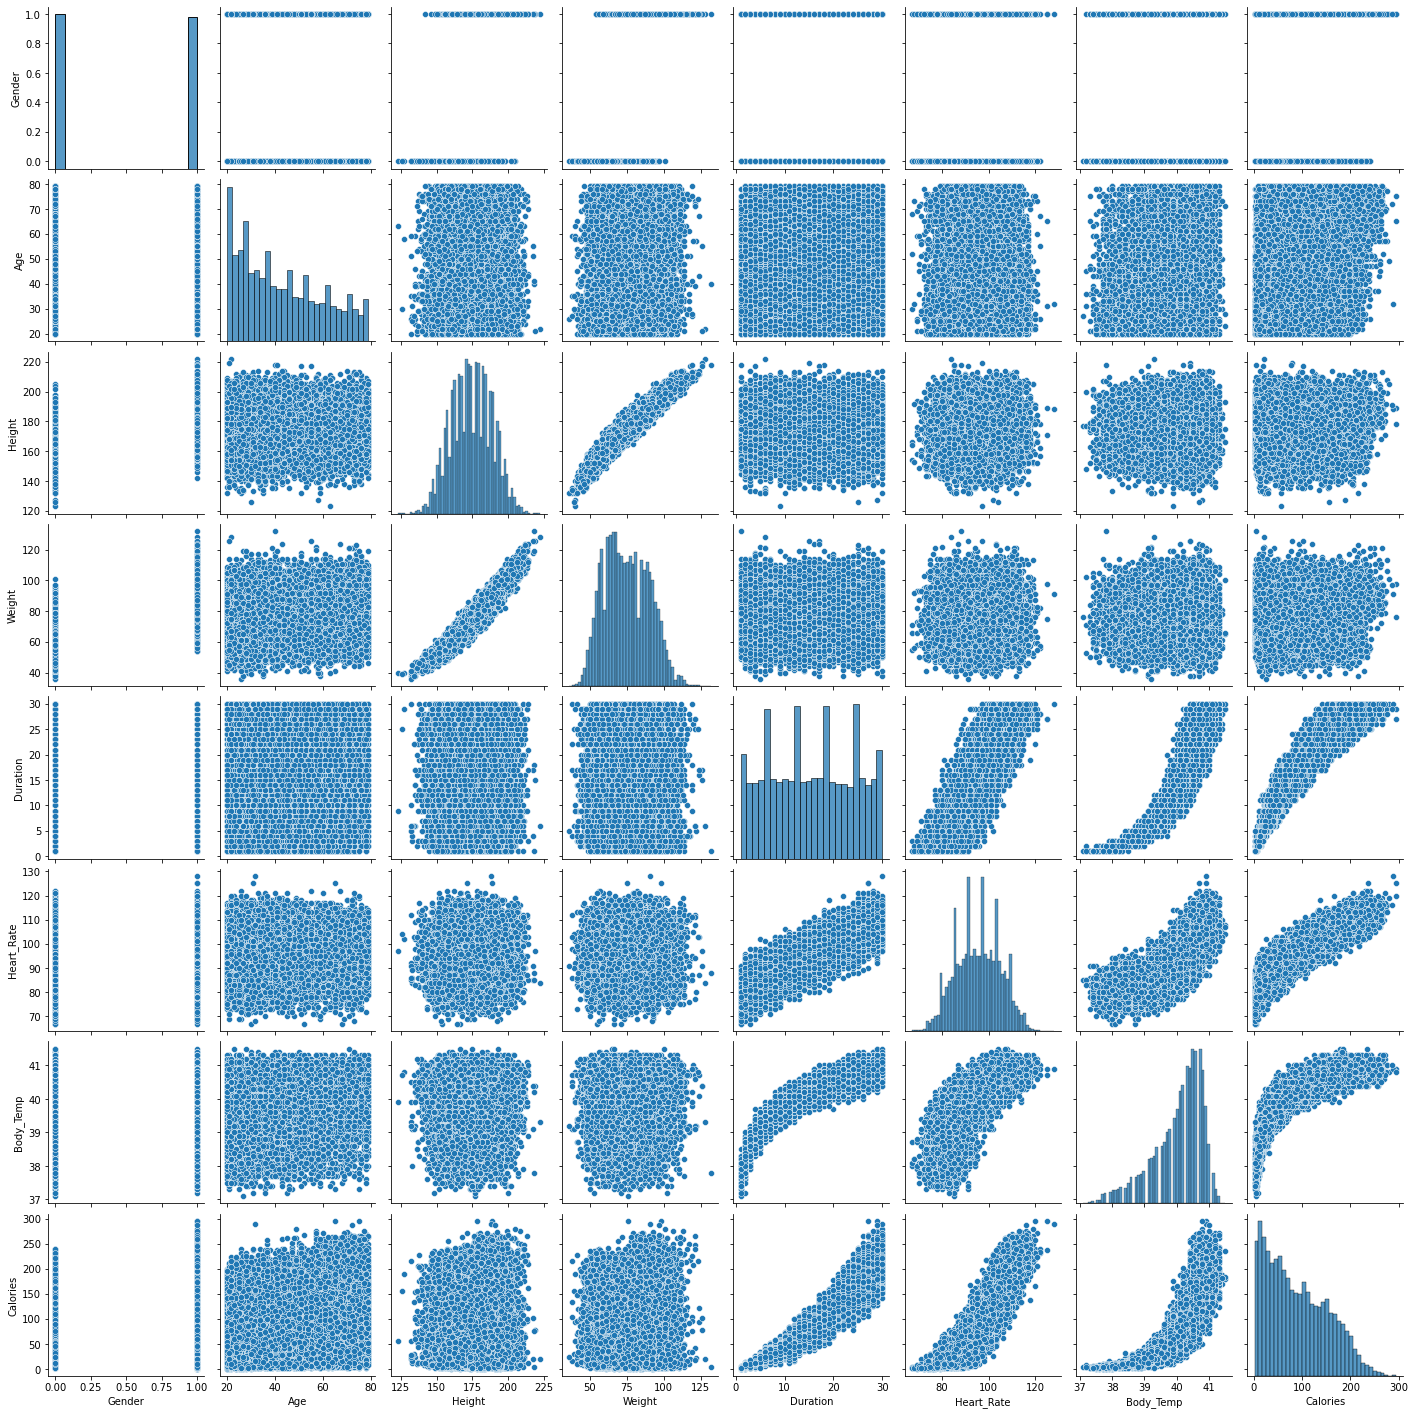

In [12]:
sns.pairplot(data)

Splitting the feature variables and target

In [13]:
X = data.iloc[: , :-1].values
y= data.iloc[: , -1].values

In [16]:
X

array([[  1. ,  68. , 190. , ...,  29. , 105. ,  40.8],
       [  0. ,  20. , 166. , ...,  14. ,  94. ,  40.3],
       [  1. ,  69. , 179. , ...,   5. ,  88. ,  38.7],
       ...,
       [  0. ,  43. , 159. , ...,  16. ,  90. ,  40.1],
       [  1. ,  78. , 193. , ...,   2. ,  84. ,  38.3],
       [  1. ,  63. , 173. , ...,  18. ,  92. ,  40.5]])

In [17]:
y

array([231.,  66.,  26., ...,  75.,  11.,  98.])

splitting X and y into training and testing data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 30)

Applying the algo.

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
linreg = LinearRegression()
linreg.fit(X_train , y_train)

LinearRegression()

In [23]:
y_pred = linreg.predict(X_test)

Checking the model performance

In [24]:
from sklearn.metrics import r2_score

In [25]:
print("r2 score : " , r2_score(y_pred , y_test))

r2 score :  0.9648528427492103


In [28]:
print("unknown value prediction : " , linreg.predict([[1,68,190 , 94.0, 29.0 , 105.0, 40.8]]))

unknown value prediction :  [199.52918195]
